In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("State wise domestic and international tourists 2019-20.csv")
data.head()

,States/Uts,Domestic -2019,Foreign - 2019,Domestic -2020,Foreign - 2020,Growth rate - DomestivTourisVisit 2020/19,Growth rate - ForeignTouristVisit 2020/19
0,A&N Island,505398,16206,191207,5412,-62.17,-66.60
1,Andhra Pradesh,237051508,280356,70828590,67591,-70.12,-75.89
2,Arunachal Pradesh,555639,7825,42871,961,-92.28,-87.72
3,Assam,5447805,26878,1266898,7285,-76.74,-72.90
4,Bihar,33990038,1093141,5638024,308080,-83.41,-71.82


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   States/Uts                                  38 non-null     object 
 1   Domestic -2019                              38 non-null     int64  
 2   Foreign - 2019                              38 non-null     int64  
 3   Domestic -2020                              38 non-null     int64  
 4   Foreign - 2020                              38 non-null     int64  
 5   Growth rate - DomestivTourisVisit  2020/19  38 non-null     float64
 6   Growth rate - ForeignTouristVisit 2020/19   38 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 2.2+ KB


In [4]:
data.isna().sum()

States/Uts                                    0
Domestic -2019                                0
Foreign - 2019                                0
Domestic -2020                                0
Foreign - 2020                                0
Growth rate - DomestivTourisVisit  2020/19    0
Growth rate - ForeignTouristVisit 2020/19     0
dtype: int64

<Axes: >

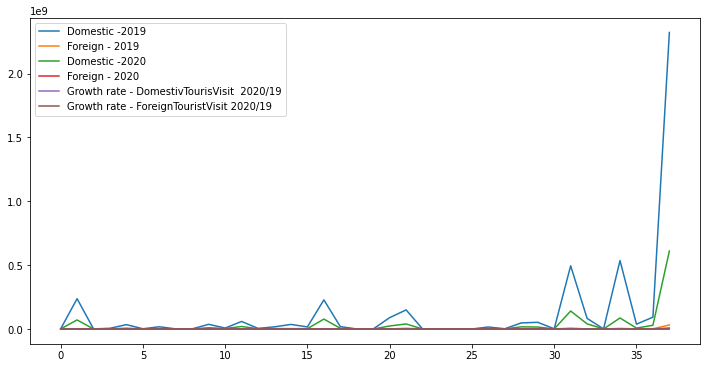

In [5]:
data.plot(figsize=(12,6))

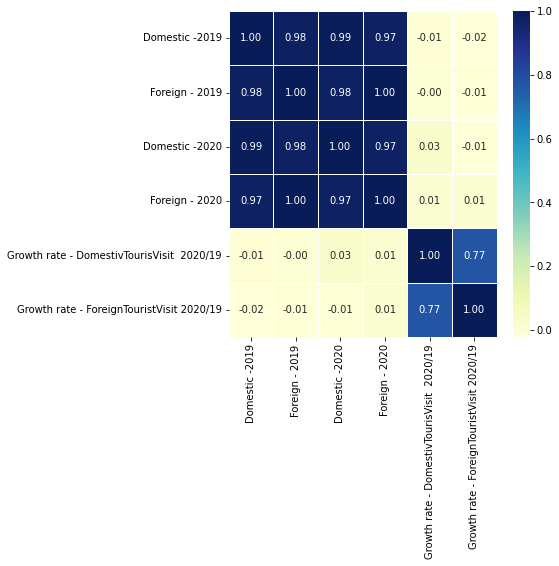

In [6]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [7]:
pd.api.types.is_string_dtype(data["States/Uts"])

True

In [8]:
# Find the columns which contain strings
# data_temp.items() treats the data like dict where keys are col names and values are the values corresponding to each key
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

States/Uts


In [9]:
# This will convert all strings to category
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()    # assigns a numeric value to each category

In [10]:
data["States/Uts"].cat.categories

Index(['A&N Island ', 'Andhra Pradesh  ', 'Arunachal Pradesh ', 'Assam ',
       'Bihar  ', 'Chandigarh  ', 'Chhattisgarh ', 'Dadra & Nagar Haveli ',
       'Daman & Diu', 'Delhi', 'Goa ', 'Grand Total', 'Gujarat ', 'Haryana ',
       'Himachal Pradesh  ', 'J&K ', 'Jharkhand', 'Karnataka ', 'Kerala ',
       'Ladakh', 'Lakshdweep ', 'Madhya Pradesh', 'Maharashtra ', 'Manipur  ',
       'Meghalaya ', 'Mizoram ', 'Nagaland ', 'Odisha ', 'Puducherry',
       'Punjab ', 'Rajasthan  ', 'Sikkim ', 'Tamil Nadu ', 'Telengana',
       'Tripura ', 'Uttar Pradesh', 'Uttarakhand ', 'West Bengal '],
      dtype='object')

In [11]:
data['StateCodes'] = data["States/Uts"].cat.codes

In [12]:
X = data.drop(columns=["Growth rate - ForeignTouristVisit 2020/19","States/Uts"],axis=1)
y = data["Growth rate - ForeignTouristVisit 2020/19"]

In [13]:
X.head()

,Domestic -2019,Foreign - 2019,Domestic -2020,Foreign - 2020,Growth rate - DomestivTourisVisit 2020/19,StateCodes
0,505398,16206,191207,5412,-62.17,0
1,237051508,280356,70828590,67591,-70.12,1
2,555639,7825,42871,961,-92.28,2
3,5447805,26878,1266898,7285,-76.74,3
4,33990038,1093141,5638024,308080,-83.41,4


In [14]:
y.head()

0   -66.60
1   -75.89
2   -87.72
3   -72.90
4   -71.82
Name: Growth rate - ForeignTouristVisit 2020/19, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest regression

In [16]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.20318775252153742

#### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.609586664290028

#### Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor(random_state=42)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.20572666357195568

#### Ridge Regression

In [19]:
from sklearn.linear_model import Ridge

model4 = Ridge(random_state=42)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.6095554128444156

#### XG Boost

In [20]:
import xgboost as xgb

model5 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model5.fit(X_train,y_train)
model5.score(X_test,y_test)               

[12:04:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


-2.4135972280212434

In [21]:
y_preds_2 = model2.predict(X)
scores_2 = pd.DataFrame(columns=["Actual Growth rate - ForeignTouristVisit 2020/19","Predicted Growth rate - ForeignTouristVisit 2020/19"])
scores_2["Actual Growth rate - ForeignTouristVisit 2020/19"] = y
scores_2["Predicted Growth rate - ForeignTouristVisit 2020/19"] = y_preds_2
scores_2.head(10)


,Actual Growth rate - ForeignTouristVisit 2020/19,Predicted Growth rate - ForeignTouristVisit 2020/19
0,-66.60,-67.702009
1,-75.89,-76.106495
2,-87.72,-89.292877
3,-72.90,-78.245876
4,-71.82,-80.555414
5,-72.31,-75.904267
6,-65.94,-83.130947
7,-86.67,-83.038050
8,-75.77,-71.627922
9,-77.20,-75.865590


Text(0, 0.5, 'Growth rate - ForeignTouristVisit 2020/19')

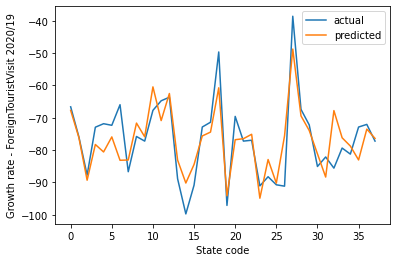

In [22]:
plt.plot(scores_2["Actual Growth rate - ForeignTouristVisit 2020/19"], label='actual')
plt.plot(scores_2["Predicted Growth rate - ForeignTouristVisit 2020/19"], label='predicted')
plt.legend()
plt.xlabel("State code")
plt.ylabel("Growth rate - ForeignTouristVisit 2020/19")

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse= mean_squared_error(y, y_preds_2)
rmse= r2_score(y, y_preds_2)
mae = mean_absolute_error(y,y_preds_2)

mse,rmse,mae

(47.35938278274419, 0.6762499117238289, 5.209098777416944)

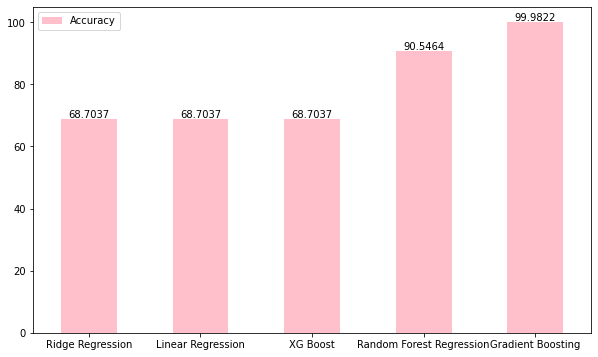

In [24]:
model_score = {'Ridge Regression':68.7037,
               'Linear Regression':68.7037,
               'XG Boost':68.7037,
               'Random Forest Regression':90.5464,
               'Gradient Boosting':99.9822}

model_compare = pd.DataFrame(model_score, index=["Accuracy"])
ax = model_compare.T.plot.bar(color="pink", figsize=(10,6));
plt.bar_label(ax.containers[0])
plt.xticks(rotation=0);